<a href="https://colab.research.google.com/github/SalmanJubairJim6/ECGR_5105/blob/main/Assignment1_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()  # 

import io
import pandas as pd

# Read the CSV file 
data = pd.read_csv(io.BytesIO(uploaded['D3.csv']))


Saving D3.csv to D3.csv


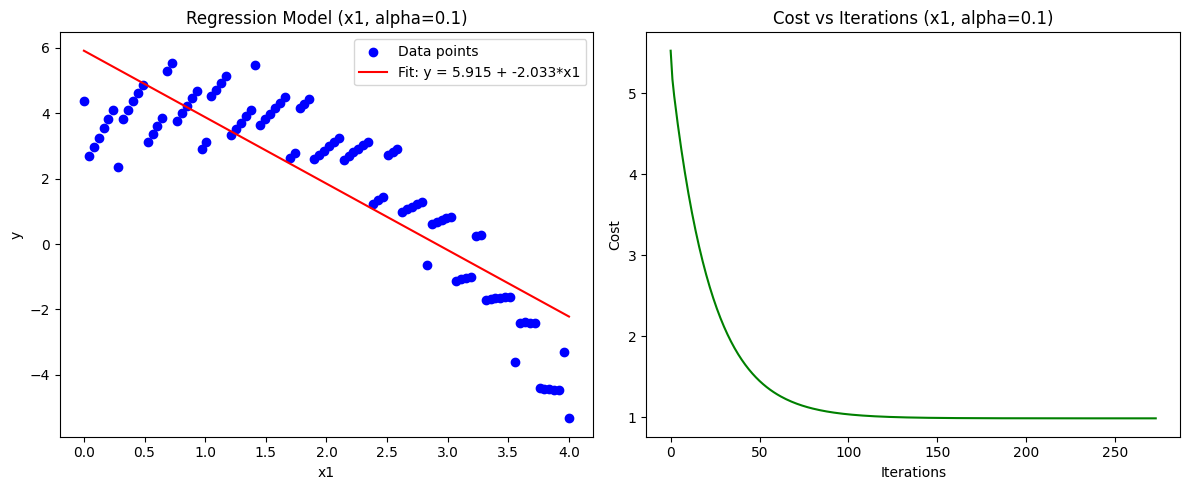

Model for x1 with alpha = 0.1: y = 5.915 + -2.033 * x1
Final cost: 0.9850



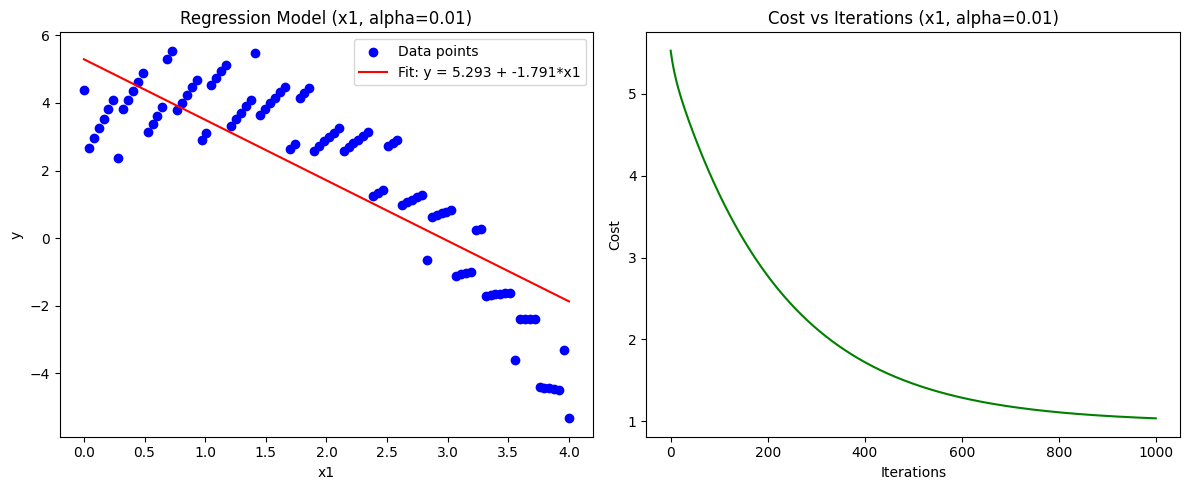

Model for x1 with alpha = 0.01: y = 5.293 + -1.791 * x1
Final cost: 1.0367



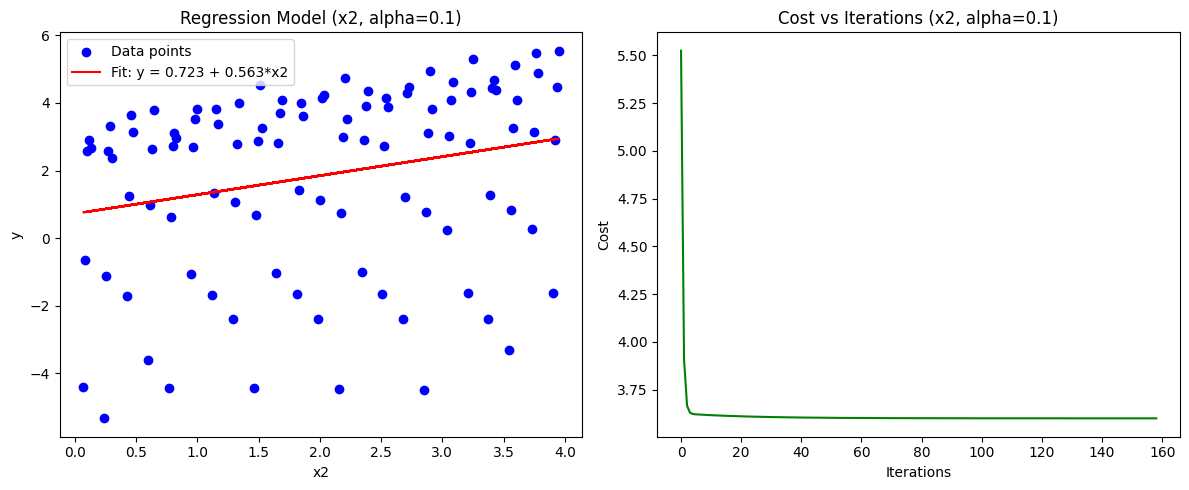

Model for x2 with alpha = 0.1: y = 0.723 + 0.563 * x2
Final cost: 3.5994



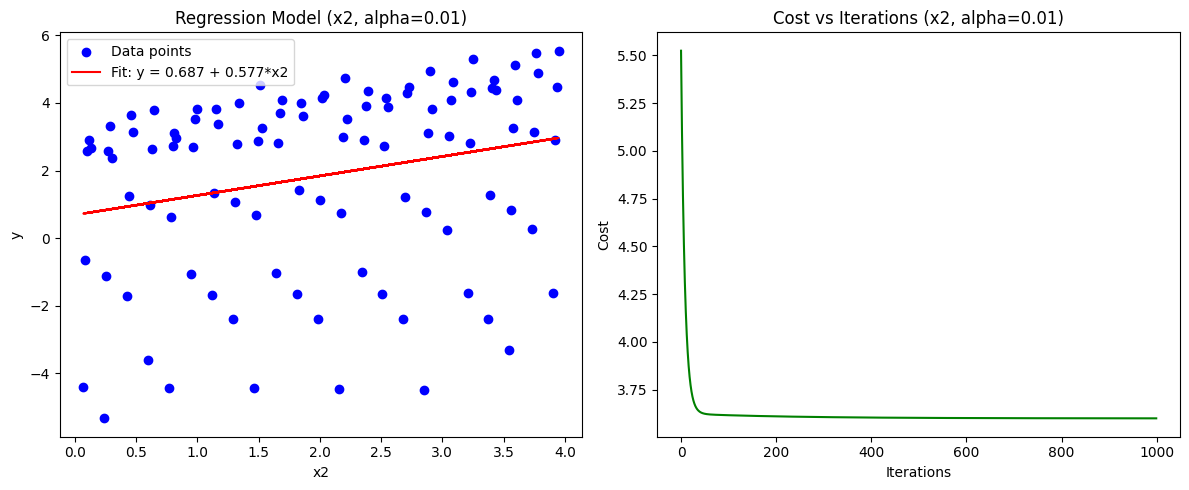

Model for x2 with alpha = 0.01: y = 0.687 + 0.577 * x2
Final cost: 3.5997



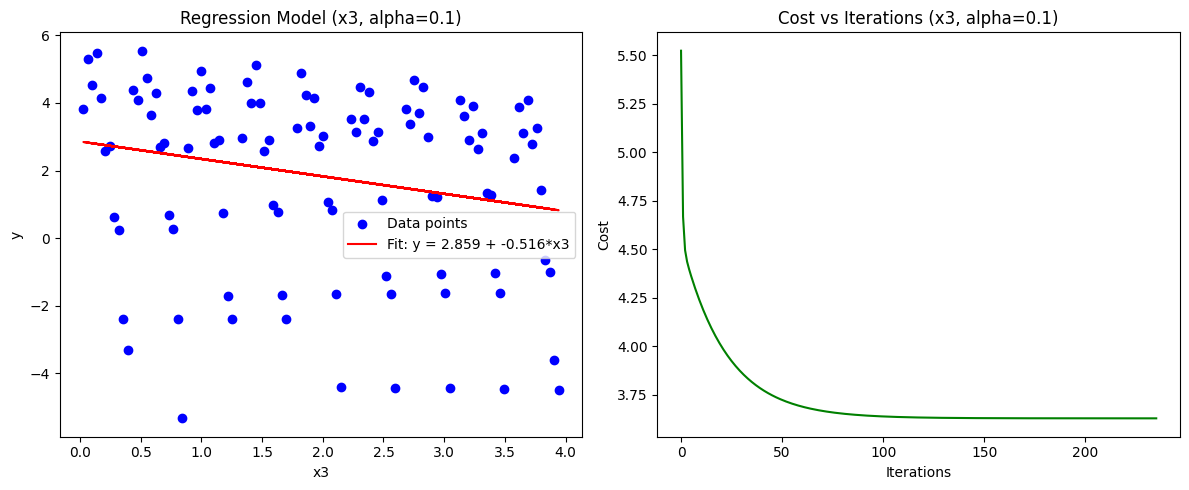

Model for x3 with alpha = 0.1: y = 2.859 + -0.516 * x3
Final cost: 3.6295



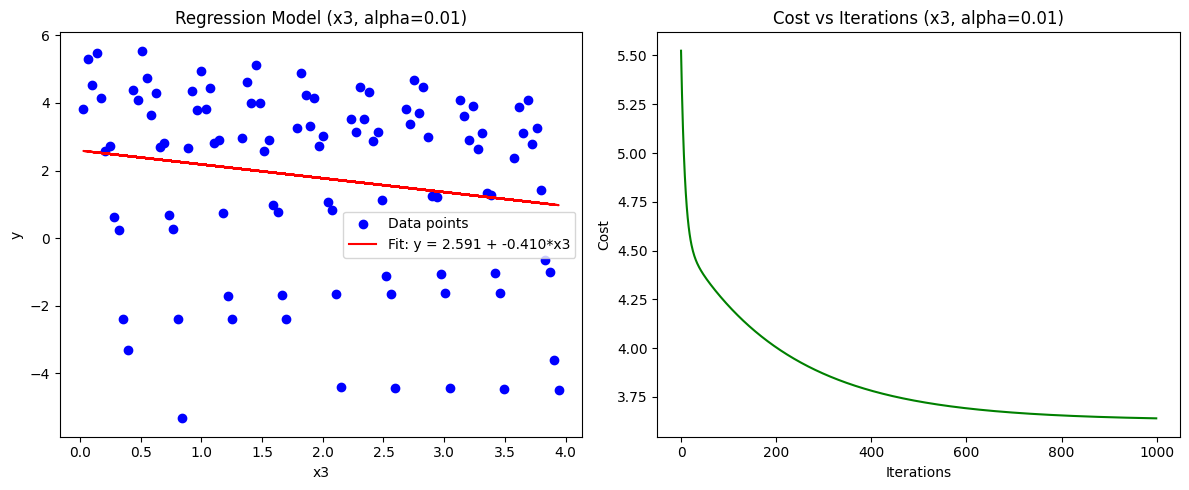

Model for x3 with alpha = 0.01: y = 2.591 + -0.410 * x3
Final cost: 3.6397



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('D3.csv')

x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y  = data.iloc[:, 3].values

def gradient_descent_SALMAN(x, y, alpha, num_iters=1000, tol=1e-6):
    m = len(y)
    theta0, theta1 = 0.0, 0.0
    cost_history = []

    for i in range(num_iters):
        predictions = theta0 + theta1 * x
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Compute gradients
        grad_theta0 = (1/m) * np.sum(error)
        grad_theta1 = (1/m) * np.sum(error * x)

        # Update parameters
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1

        # break if change in cost is very small
        if i > 0 and abs(cost_history[-2] - cost) < tol:
            break

    return theta0, theta1, cost_history

# Experiment with learning rates
learning_rates = [0.1, 0.01]

# Dictionary to store results
results = {}

for var_name, x in zip(['x1', 'x2', 'x3'], [x1, x2, x3]):
    for alpha in learning_rates:
        theta0, theta1, cost_history = gradient_descent_SALMAN(x, y, alpha)
        results[(var_name, alpha)] = (theta0, theta1, cost_history)

        # Plot regression line over data
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.scatter(x, y, color='blue', label='Data points')
        plt.plot(x, theta0 + theta1*x, color='red', label=f'Fit: y = {theta0:.3f} + {theta1:.3f}*{var_name}')
        plt.xlabel(var_name)
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Regression Model ({var_name}, alpha={alpha})')

        # Plot cost over iterations
        plt.subplot(1,2,2)
        plt.plot(cost_history, color='green')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title(f'Cost vs Iterations ({var_name}, alpha={alpha})')
        plt.tight_layout()
        plt.show()

        print(f"Model for {var_name} with alpha = {alpha}: y = {theta0:.3f} + {theta1:.3f} * {var_name}")
        print(f"Final cost: {cost_history[-1]:.4f}\n")
